### The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

### Project:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data gathering / Data organization

Review the Source Documentation

Understand the field names and data types

Identify relationships across the files

### Data wrangling

Field/feature transformations

Determine which files should be joined versus which ones should be appended

Create master data and explain the relationship

In [2]:
Cab_Data = pd.read_csv('Cab_Data.csv')
City = pd.read_csv('City.csv')
Customer_ID = pd.read_csv('Customer_ID.csv')
Transaction_ID = pd.read_csv('Transaction_ID.csv')

### Datasets:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

In [3]:
Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
# Correcting the "Date of Travel" column data type
#
# base_date = pd.Timestamp('1900-01-01')
#
# for i in range(len(Cab_Data)):
#     numerical_date=int(Cab_Data.loc[i, ['Date of Travel']])
#     Cab_Data.loc[i, ['Date of Travel']]= pd.to_datetime(base_date + pd.DateOffset(numerical_date), format='%y/%m/%d')

In [5]:
# Cab_Data.to_csv('out.csv')

In [6]:
Cab_Data_Out = pd.read_csv('Cab_Data_Out.csv')

In [7]:
Cab_Data_Out.head()

,Unnamed: 0,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,0,10000011,2016-01-10 00:00:00,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,1,10000012,2016-01-08 00:00:00,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,2,10000013,2016-01-04 00:00:00,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,3,10000014,2016-01-09 00:00:00,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,4,10000015,2016-01-05 00:00:00,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [8]:
# Delete strange column

Cab_Data_Out.drop('Unnamed: 0', axis='columns', inplace=True)

In [9]:
City.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [10]:
# Convert columns from string to numeric
City['Population'] = City['Population'].str.replace(',','')
City['Users'] = City['Users'].str.replace(',','')
City['Population'] = pd.to_numeric(City['Population'])
City['Users'] = pd.to_numeric(City['Users'])

In [11]:
Customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [12]:
Transaction_ID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [13]:
Cab_Data_Out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [14]:
City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [15]:
Customer_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [16]:
Transaction_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


#### Union all data to master_data dataframe

In [17]:
master_data_1 = pd.merge(Transaction_ID, Customer_ID, how="outer", on=["Customer ID"])

In [18]:
master_data_2 = pd.merge(master_data_1, Cab_Data_Out, how="outer", on=["Transaction ID"])

In [19]:
master_data = pd.merge(master_data_2, City, how="left", on=["City"])

In [20]:
master_data.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,29290,Card,Male,28,10813,2016-01-10 00:00:00,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885.0,24701.0
1,10351127,29290,Cash,Male,28,10813,2018-07-23 00:00:00,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885.0,24701.0
2,10412921,29290,Card,Male,28,10813,2018-11-25 00:00:00,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885.0,24701.0
3,10000012,27703,Card,Male,27,9237,2016-01-08 00:00:00,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885.0,24701.0
4,10320494,27703,Card,Male,27,9237,2018-04-23 00:00:00,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885.0,24701.0


In [21]:
# rename columns
master_data = master_data.rename(columns={"Population": "City Population", 
                            "Users": "City Users", 
                            "Gender": "Customer Gender", 
                            "Age": "Customer Age",
                            "Income (USD/Month)": "Customer Income (USD/month)"})

In [22]:
master_data

,Transaction ID,Customer ID,Payment_Mode,Customer Gender,Customer Age,Customer Income (USD/month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,City Population,City Users
0,10000011,29290,Card,Male,28,10813,2016-01-10 00:00:00,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885.0,24701.0
1,10351127,29290,Cash,Male,28,10813,2018-07-23 00:00:00,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885.0,24701.0
2,10412921,29290,Card,Male,28,10813,2018-11-25 00:00:00,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885.0,24701.0
3,10000012,27703,Card,Male,27,9237,2016-01-08 00:00:00,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885.0,24701.0
4,10320494,27703,Card,Male,27,9237,2018-04-23 00:00:00,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885.0,24701.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440093,10439799,12490,Cash,Male,33,18713,2018-01-05 00:00:00,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,1177609.0,27247.0
440094,10439820,14971,Card,Male,30,15346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440095,10439838,41414,Card,Male,38,3960,2018-01-06 00:00:00,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,631442.0,5712.0
440096,10439840,41677,Cash,Male,23,19454,2018-01-08 00:00:00,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,631442.0,5712.0


### Data governance / Data quality

Identify and remove duplicates

Perform other analysis like NA value and outlier detection

#### Let's work with NA data

In [23]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440098 entries, 0 to 440097
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Transaction ID               440098 non-null  int64  
 1   Customer ID                  440098 non-null  int64  
 2   Payment_Mode                 440098 non-null  object 
 3   Customer Gender              440098 non-null  object 
 4   Customer Age                 440098 non-null  int64  
 5   Customer Income (USD/month)  440098 non-null  int64  
 6   Date of Travel               359392 non-null  object 
 7   Company                      359392 non-null  object 
 8   City                         359392 non-null  object 
 9   KM Travelled                 359392 non-null  float64
 10  Price Charged                359392 non-null  float64
 11  Cost of Trip                 359392 non-null  float64
 12  City Population              359392 non-null  float64
 13 

In [24]:
master_data['Transaction ID'].isna().value_counts()

False    440098
Name: Transaction ID, dtype: int64

In [25]:
master_data['Customer Income (USD/month)'].isna().value_counts()

False    440098
Name: Customer Income (USD/month), dtype: int64

In [26]:
master_data['Cost of Trip'].isna().value_counts()

False    359392
True      80706
Name: Cost of Trip, dtype: int64

#### We have data on 440,098 user transactions, but only 359,392 pertain to the Cab Industry during the period of interest. Therefore, our dataset contains missing values. For our research, we can delete rows with missing data.

In [27]:
master_data = master_data.dropna()

In [28]:
master_data

,Transaction ID,Customer ID,Payment_Mode,Customer Gender,Customer Age,Customer Income (USD/month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,City Population,City Users
0,10000011,29290,Card,Male,28,10813,2016-01-10 00:00:00,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885.0,24701.0
1,10351127,29290,Cash,Male,28,10813,2018-07-23 00:00:00,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885.0,24701.0
2,10412921,29290,Card,Male,28,10813,2018-11-25 00:00:00,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885.0,24701.0
3,10000012,27703,Card,Male,27,9237,2016-01-08 00:00:00,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885.0,24701.0
4,10320494,27703,Card,Male,27,9237,2018-04-23 00:00:00,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885.0,24701.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440092,10439790,38520,Card,Female,42,19417,2018-01-09 00:00:00,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,671238.0,25063.0
440093,10439799,12490,Cash,Male,33,18713,2018-01-05 00:00:00,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,1177609.0,27247.0
440095,10439838,41414,Card,Male,38,3960,2018-01-06 00:00:00,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,631442.0,5712.0
440096,10439840,41677,Cash,Male,23,19454,2018-01-08 00:00:00,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,631442.0,5712.0


#### Let's work with outlier detection

In [29]:
master_data['Payment_Mode'].value_counts()

Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64

In [30]:
master_data['Customer Gender'].value_counts()

Male      205912
Female    153480
Name: Customer Gender, dtype: int64

In [31]:
master_data.describe()

,Transaction ID,Customer ID,Customer Age,Customer Income (USD/month),KM Travelled,Price Charged,Cost of Trip,City Population,City Users
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000
mean,1.022076e+07,19191.652115,35.336705,15048.822937,22.567254,423.443311,286.190113,3.132198e+06,158365.582267
std,1.268058e+05,21012.412463,12.594234,7969.409482,12.233526,274.378911,157.993661,3.315194e+06,100850.051020
min,1.000001e+07,1.000000,18.000000,2000.000000,1.900000,15.600000,19.000000,2.489680e+05,3643.000000
25%,1.011081e+07,2705.000000,25.000000,8424.000000,12.000000,206.437500,151.200000,6.712380e+05,80021.000000
50%,1.022104e+07,7459.000000,33.000000,14685.000000,22.440000,386.360000,282.480000,1.595037e+06,144132.000000
75%,1.033094e+07,36078.000000,42.000000,21035.000000,32.960000,583.660000,413.683200,8.405837e+06,302149.000000
max,1.044011e+07,60000.000000,65.000000,35000.000000,48.000000,2048.030000,691.200000,8.405837e+06,302149.000000


In [32]:
master_data.drop_duplicates()

,Transaction ID,Customer ID,Payment_Mode,Customer Gender,Customer Age,Customer Income (USD/month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,City Population,City Users
0,10000011,29290,Card,Male,28,10813,2016-01-10 00:00:00,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885.0,24701.0
1,10351127,29290,Cash,Male,28,10813,2018-07-23 00:00:00,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885.0,24701.0
2,10412921,29290,Card,Male,28,10813,2018-11-25 00:00:00,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885.0,24701.0
3,10000012,27703,Card,Male,27,9237,2016-01-08 00:00:00,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885.0,24701.0
4,10320494,27703,Card,Male,27,9237,2018-04-23 00:00:00,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885.0,24701.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440092,10439790,38520,Card,Female,42,19417,2018-01-09 00:00:00,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,671238.0,25063.0
440093,10439799,12490,Cash,Male,33,18713,2018-01-05 00:00:00,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,1177609.0,27247.0
440095,10439838,41414,Card,Male,38,3960,2018-01-06 00:00:00,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,631442.0,5712.0
440096,10439840,41677,Cash,Male,23,19454,2018-01-08 00:00:00,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,631442.0,5712.0


#### Seems like the quality of the master data is okay.

### Exploratory Data Analysis, EDA

Create multiple hypothesis and investigate:

You will need to generate 5-7 hypothesis initially to investigate as some will not prove what you are expecting.

For Example: “Is there any seasonality in number of customers using the cab service?”

Areas to investigate:

Which company has maximum cab users at a particular time period?

Does margin proportionally increase with increase in number of customers?

What are the attributes of these customer segments?

#### Let's make the data convenient for analysis. Add the month and year. Include the profit. Incorporate age and income level intervals of customers. Include intervals for city populations and the number of customers in cities.

In [33]:
master_data['Date of Travel'] = pd.to_datetime(master_data['Date of Travel'])

/var/folders/xb/1hqqlkbx5cqg9t4pk4rd0d0h0000gn/T/ipykernel_24668/107205640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_data['Date of Travel'] = pd.to_datetime(master_data['Date of Travel'])


In [34]:
master_data['Year of Travel'] = master_data['Date of Travel'].dt.year

/var/folders/xb/1hqqlkbx5cqg9t4pk4rd0d0h0000gn/T/ipykernel_24668/281183351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_data['Year of Travel'] = master_data['Date of Travel'].dt.year


In [35]:
master_data['Month of Travel'] = master_data['Date of Travel'].dt.month

/var/folders/xb/1hqqlkbx5cqg9t4pk4rd0d0h0000gn/T/ipykernel_24668/2403251779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_data['Month of Travel'] = master_data['Date of Travel'].dt.month


In [36]:
master_data['Month Name of Travel'] = master_data['Date of Travel'].dt.month_name()

/var/folders/xb/1hqqlkbx5cqg9t4pk4rd0d0h0000gn/T/ipykernel_24668/1711666307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_data['Month Name of Travel'] = master_data['Date of Travel'].dt.month_name()


In [37]:
master_data['Year&Month of Travel'] = master_data['Date of Travel'].dt.strftime('%Y/%b')

/var/folders/xb/1hqqlkbx5cqg9t4pk4rd0d0h0000gn/T/ipykernel_24668/3571022016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_data['Year&Month of Travel'] = master_data['Date of Travel'].dt.strftime('%Y/%b')


In [38]:
master_data['Profit'] = master_data['Price Charged'] - master_data['Cost of Trip']

/var/folders/xb/1hqqlkbx5cqg9t4pk4rd0d0h0000gn/T/ipykernel_24668/1661654863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_data['Profit'] = master_data['Price Charged'] - master_data['Cost of Trip']


In [39]:
master_data['Customer Age Range'] = ((master_data['Customer Age'] / 10) // 1) * 10 + 10
master_data['Customer Income (USD/month) Range'] = ((master_data['Customer Income (USD/month)'] / 5000) // 1) * 5000 + 2500

/var/folders/xb/1hqqlkbx5cqg9t4pk4rd0d0h0000gn/T/ipykernel_24668/1864099128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_data['Customer Age Range'] = ((master_data['Customer Age'] / 10) // 1) * 10 + 10
/var/folders/xb/1hqqlkbx5cqg9t4pk4rd0d0h0000gn/T/ipykernel_24668/1864099128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_data['Customer Income (USD/month) Range'] = ((master_data['Customer Income (USD/month)'] / 5000) // 1) * 5000 + 2500


In [40]:
master_data['City Population Range'] = ((master_data['City Population'] / 500000) // 1) * 500000 + 500000
master_data['City Users Range'] = ((master_data['City Users'] / 50000) // 1) * 50000 + 50000

/var/folders/xb/1hqqlkbx5cqg9t4pk4rd0d0h0000gn/T/ipykernel_24668/960966359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_data['City Population Range'] = ((master_data['City Population'] / 500000) // 1) * 500000 + 500000
/var/folders/xb/1hqqlkbx5cqg9t4pk4rd0d0h0000gn/T/ipykernel_24668/960966359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_data['City Users Range'] = ((master_data['City Users'] / 50000) // 1) * 50000 + 50000


In [41]:
master_data

,Transaction ID,Customer ID,Payment_Mode,Customer Gender,Customer Age,Customer Income (USD/month),Date of Travel,Company,City,KM Travelled,...,City Users,Year of Travel,Month of Travel,Month Name of Travel,Year&Month of Travel,Profit,Customer Age Range,Customer Income (USD/month) Range,City Population Range,City Users Range
0,10000011,29290,Card,Male,28,10813,2016-01-10,Pink Cab,ATLANTA GA,30.45,...,24701.0,2016,1,January,2016/Jan,57.3150,30.0,12500.0,1000000.0,50000.0
1,10351127,29290,Cash,Male,28,10813,2018-07-23,Yellow Cab,ATLANTA GA,26.19,...,24701.0,2018,7,July,2018/Jul,281.2772,30.0,12500.0,1000000.0,50000.0
2,10412921,29290,Card,Male,28,10813,2018-11-25,Yellow Cab,ATLANTA GA,42.55,...,24701.0,2018,11,November,2018/Nov,194.6480,30.0,12500.0,1000000.0,50000.0
3,10000012,27703,Card,Male,27,9237,2016-01-08,Pink Cab,ATLANTA GA,28.62,...,24701.0,2016,1,January,2016/Jan,23.6660,30.0,7500.0,1000000.0,50000.0
4,10320494,27703,Card,Male,27,9237,2018-04-23,Yellow Cab,ATLANTA GA,36.38,...,24701.0,2018,4,April,2018/Apr,253.9808,30.0,7500.0,1000000.0,50000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440092,10439790,38520,Card,Female,42,19417,2018-01-09,Yellow Cab,SEATTLE WA,16.66,...,25063.0,2018,1,January,2018/Jan,47.2656,50.0,17500.0,1000000.0,50000.0
440093,10439799,12490,Cash,Male,33,18713,2018-01-05,Yellow Cab,SILICON VALLEY,13.72,...,27247.0,2018,1,January,2018/Jan,105.0980,40.0,17500.0,1500000.0,50000.0
440095,10439838,41414,Card,Male,38,3960,2018-01-06,Yellow Cab,TUCSON AZ,19.00,...,5712.0,2018,1,January,2018/Jan,71.2100,40.0,2500.0,1000000.0,50000.0
440096,10439840,41677,Cash,Male,23,19454,2018-01-08,Yellow Cab,TUCSON AZ,5.60,...,5712.0,2018,1,January,2018/Jan,21.8600,30.0,17500.0,1000000.0,50000.0


#### Let's remove the data for the year 2019; there's very little of them and it might distort the overall picture.

In [42]:
master_data = master_data.drop(master_data[master_data['Year of Travel'] == 2019].index)

### Investigation: 

#### 1) Let's check which company has the highest profit.
#### 2) Examine how the profit of each company changes over time, by years and months.
#### 3) Is there any company showing a consistent growth in profit?
#### 4) Explore how profit changes across customer groups: by age categories, income levels, and gender.
#### 5) Is there a pattern in how profit changes across cities based on city characteristics?
#### 6) Are there any correlations between the data?

In [43]:
master_data.groupby('Company')['Profit'].sum()

Company
Pink Cab      5.298865e+06
Yellow Cab    4.398301e+07
Name: Profit, dtype: float64

In [44]:
master_data.groupby('Company')['Transaction ID'].count()

Company
Pink Cab       84597
Yellow Cab    274282
Name: Transaction ID, dtype: int64

#### Based on the available data, the profit of the Yellow Cab company is higher, but the data on the Yellow Cab company is disproportionately larger. It is clear that the Yellow Cab company is currently larger and generates more profit.

In [45]:
sns.set()

In [46]:
df1 = master_data.groupby(['Company', 'Year of Travel', 'Month of Travel'])['Profit'].sum().reset_index()
df1 = df1.rename(columns={"Profit": "Total Profit"}) 
df1

,Company,Year of Travel,Month of Travel,Total Profit
0,Pink Cab,2016,1,6.364727e+04
1,Pink Cab,2016,2,8.856574e+04
2,Pink Cab,2016,3,9.420610e+04
3,Pink Cab,2016,4,7.811705e+04
4,Pink Cab,2016,5,6.720988e+04
...,...,...,...,...
67,Yellow Cab,2018,8,8.209687e+05
68,Yellow Cab,2018,9,1.198128e+06
69,Yellow Cab,2018,10,1.339748e+06
70,Yellow Cab,2018,11,1.351331e+06


/var/folders/xb/1hqqlkbx5cqg9t4pk4rd0d0h0000gn/T/ipykernel_24668/2610415933.py:2: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.relplot(data=df1, x='Month of Travel', y='Total Profit',


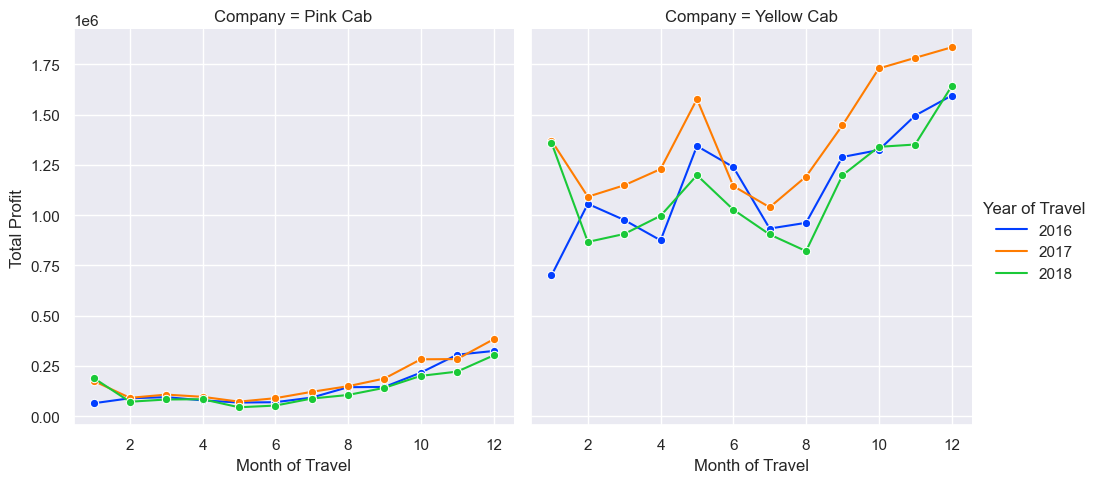

In [47]:
color_palette = sns.color_palette('bright')
sns.relplot(data=df1, x='Month of Travel', y='Total Profit', 
            hue='Year of Travel', col='Company', 
            kind='line', marker='o', palette = color_palette);

#### There is a distinct seasonality in the data. In the Yellow Cab company, the seasonality is more pronounced. There is a significant increase in profit from September to January and in May. Conversely, there is a decrease in profit from February to April and in June - July. In the Pink Cab company, there is also a noticeable increase in profit, but from July to January.

#### Additionally, it can be observed that the profit of both companies increased in 2017 compared to 2016, but experienced a sharp decline in 2018.

### Let's explore profit by cities, age categories, income levels, and gender.

In [48]:
df2 = master_data.groupby(['Company', 'Customer Age Range'])['Profit'].sum().reset_index()
df2 = df2.rename(columns={"Profit": "Total Profit"}) 
df2

,Company,Customer Age Range,Total Profit
0,Pink Cab,20.0,3.480865e+05
1,Pink Cab,30.0,1.734288e+06
2,Pink Cab,40.0,1.650752e+06
3,Pink Cab,50.0,6.713344e+05
4,Pink Cab,60.0,5.584461e+05
5,Pink Cab,70.0,3.359583e+05
6,Yellow Cab,20.0,2.627421e+06
7,Yellow Cab,30.0,1.440430e+07
8,Yellow Cab,40.0,1.379131e+07
9,Yellow Cab,50.0,5.863927e+06


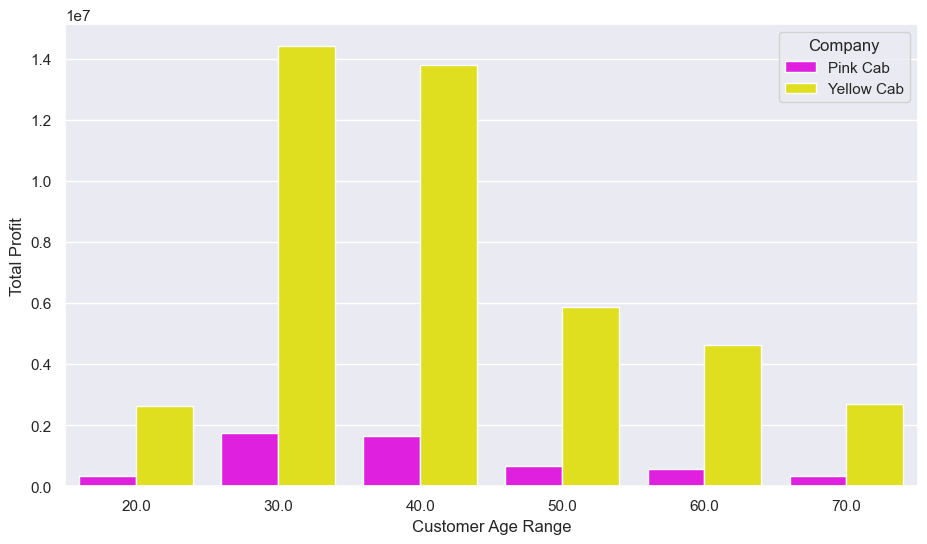

In [49]:
sns.set(rc={'figure.figsize':(11,6)})
color_palette = {c: 'magenta' if c != 'Yellow Cab' else 'yellow' for c in df2['Company'].unique()}
sns.barplot(x='Customer Age Range',
            y='Total Profit',
            hue='Company',
            palette=color_palette,            
            data=df2);

#### We see that the main customer group consists of people aged 20 to 40. The second, less numerous group is from 40 to 60 years old.

In [50]:
df3 = master_data.groupby(['Company', 'Customer Gender'])['Profit'].sum().reset_index()
df3 = df3.rename(columns={"Profit": "Total Profit"}) 
df3

,Company,Customer Gender,Total Profit
0,Pink Cab,Female,2.326998e+06
1,Pink Cab,Male,2.971867e+06
2,Yellow Cab,Female,1.811506e+07
3,Yellow Cab,Male,2.586795e+07


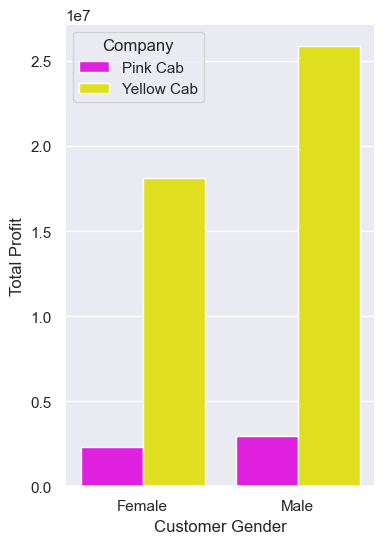

In [51]:
sns.set(rc={'figure.figsize':(4,6)})
color_palette = {c: 'magenta' if c != 'Yellow Cab' else 'yellow' for c in df3['Company'].unique()}
sns.barplot(df3, x="Customer Gender", y="Total Profit", hue="Company",
    palette=color_palette);

#### It can also be noticed that men rent cars more frequently.

In [52]:
df4 = master_data.groupby(['Company', 'Customer Income (USD/month) Range'])['Profit'].sum().reset_index()
df4 = df4.rename(columns={"Profit": "Total Profit"}) 
df4

,Company,Customer Income (USD/month) Range,Total Profit
0,Pink Cab,2500.0,6.335752e+05
1,Pink Cab,7500.0,1.027892e+06
2,Pink Cab,12500.0,1.021485e+06
3,Pink Cab,17500.0,1.059856e+06
4,Pink Cab,22500.0,1.070507e+06
5,Pink Cab,27500.0,2.411835e+05
6,Pink Cab,32500.0,2.443413e+05
7,Pink Cab,37500.0,2.494000e+01
8,Yellow Cab,2500.0,5.074966e+06
9,Yellow Cab,7500.0,8.437396e+06


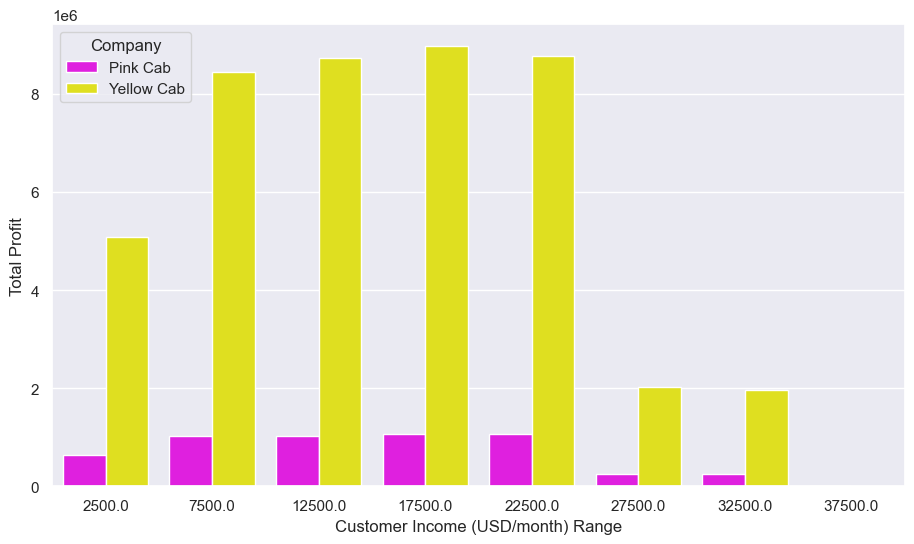

In [53]:
sns.set(rc={'figure.figsize':(11,6)})
color_palette = {c: 'magenta' if c != 'Yellow Cab' else 'yellow' for c in df4['Company'].unique()}
sns.barplot(x='Customer Income (USD/month) Range',
            y='Total Profit',
            hue='Company',
            palette=color_palette,           
            data=df4);

#### Furthermore, it can be seen that the majority of people renting cars have a monthly income of up to 25,000 USD. There is a sharp decline in profit generated by customers with a monthly income exceeding 25,000 USD.

In [54]:
df5 = master_data.groupby(['Company', 'City Population Range'])['Profit'].sum().reset_index()
df5 = df5.rename(columns={"Profit": "Total Profit"}) 
df5

,Company,City Population Range,Total Profit
0,Pink Cab,500000.0,5.190063e+05
1,Pink Cab,1000000.0,1.224483e+06
2,Pink Cab,1500000.0,6.036278e+05
3,Pink Cab,2000000.0,1.442999e+06
4,Pink Cab,8500000.0,1.508749e+06
5,Yellow Cab,500000.0,4.888714e+06
6,Yellow Cab,1000000.0,4.392063e+06
7,Yellow Cab,1500000.0,1.925253e+06
8,Yellow Cab,2000000.0,6.349252e+06
9,Yellow Cab,8500000.0,2.642773e+07


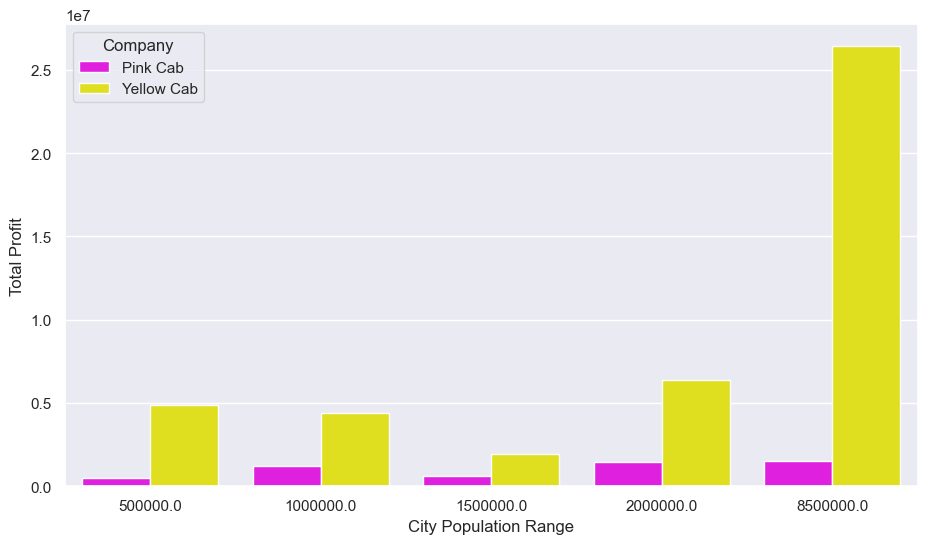

In [55]:
sns.set(rc={'figure.figsize':(11,6)})
color_palette = {c: 'magenta' if c != 'Yellow Cab' else 'yellow' for c in df5['Company'].unique()}
sns.barplot(x='City Population Range',
            y='Total Profit',
            hue='Company',
            palette=color_palette,           
            data=df5);

In [56]:
df5 = master_data.groupby(['Company', 'City Users Range'])['Profit'].sum().reset_index()
df5 = df5.rename(columns={"Profit": "Total Profit"}) 
df5

,Company,City Users Range,Total Profit
0,Pink Cab,50000.0,1.255299e+06
1,Pink Cab,100000.0,8.987977e+05
2,Pink Cab,150000.0,1.317606e+06
3,Pink Cab,200000.0,3.184126e+05
4,Pink Cab,350000.0,1.508749e+06
5,Yellow Cab,50000.0,5.453727e+06
6,Yellow Cab,100000.0,2.455102e+06
7,Yellow Cab,150000.0,6.579047e+06
8,Yellow Cab,200000.0,3.067407e+06
9,Yellow Cab,350000.0,2.642773e+07


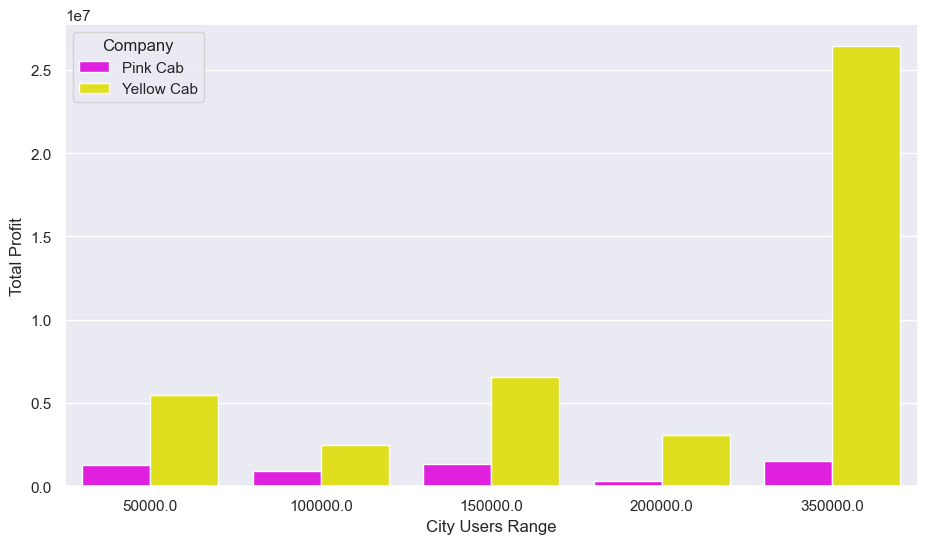

In [57]:
sns.set(rc={'figure.figsize':(11,6)})
color_palette = {c: 'magenta' if c != 'Yellow Cab' else 'yellow' for c in df5['Company'].unique()}
sns.barplot(x='City Users Range',
            y='Total Profit',
            hue='Company',
            palette=color_palette,           
            data=df5);

In [58]:
df6 = master_data.groupby(['Company', 'City'])['Profit'].sum().reset_index()
df6 = df6.rename(columns={"Profit": "Total Profit"}) 
df6

,Company,City,Total Profit
0,Pink Cab,ATLANTA GA,9.586147e+04
1,Pink Cab,AUSTIN TX,1.470329e+05
2,Pink Cab,BOSTON MA,2.617415e+05
3,Pink Cab,CHICAGO IL,3.184126e+05
4,Pink Cab,DALLAS TX,2.470098e+04
5,Pink Cab,DENVER CO,4.047581e+04
6,Pink Cab,LOS ANGELES CA,1.124587e+06
7,Pink Cab,MIAMI FL,1.622902e+05
8,Pink Cab,NASHVILLE TN,6.424506e+04
9,Pink Cab,NEW YORK NY,1.508749e+06


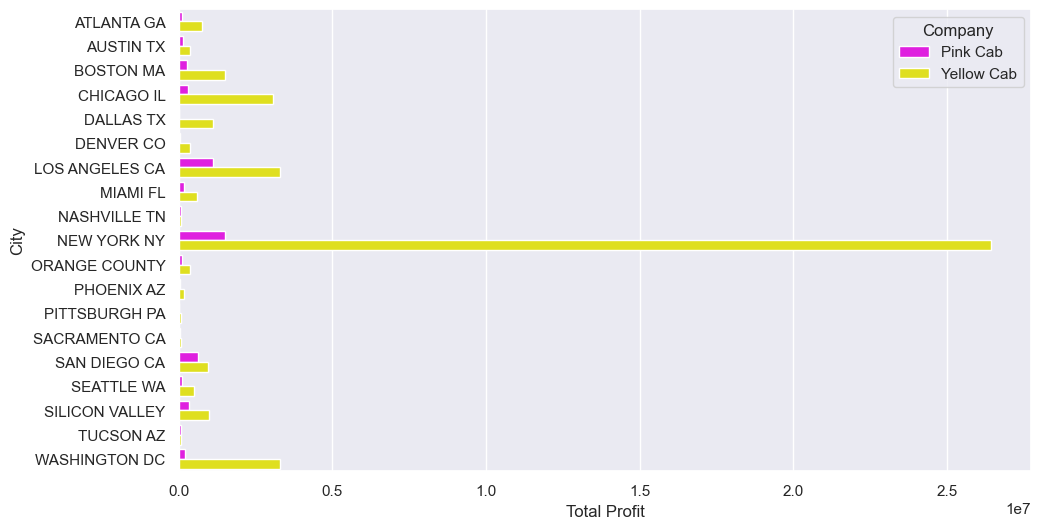

In [59]:
sns.set(rc={'figure.figsize':(11,6)})
color_palette = {c: 'magenta' if c != 'Yellow Cab' else 'yellow' for c in df6['Company'].unique()}
sns.barplot(x='Total Profit',
            y='City',
            hue='Company',
            palette=color_palette,           
            data=df6);

In [60]:
df7 = master_data.groupby(['Company', 'City'])['City Users'].first().reset_index()
df7

,Company,City,City Users
0,Pink Cab,ATLANTA GA,24701.0
1,Pink Cab,AUSTIN TX,14978.0
2,Pink Cab,BOSTON MA,80021.0
3,Pink Cab,CHICAGO IL,164468.0
4,Pink Cab,DALLAS TX,22157.0
5,Pink Cab,DENVER CO,12421.0
6,Pink Cab,LOS ANGELES CA,144132.0
7,Pink Cab,MIAMI FL,17675.0
8,Pink Cab,NASHVILLE TN,9270.0
9,Pink Cab,NEW YORK NY,302149.0


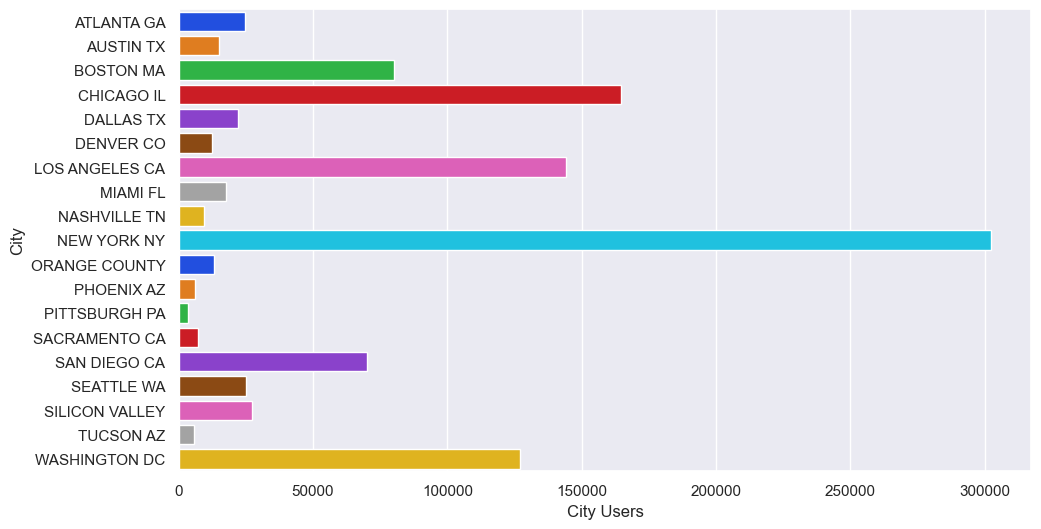

In [61]:
sns.set(rc={'figure.figsize':(11,6)})
color_palette = sns.color_palette('bright')
sns.barplot(x='City Users',
            y='City',
            palette=color_palette,           
            data=df7);

#### The cities with the highest usage of car rental services are New York, Chicago, Los Angeles, Washington, Boston, and San Diego. The Yellow Cab company has the highest profit in cities like New York (especially), Los Angeles, Chicago, Washington, and Boston. The Pink Cab company shows the highest profit in New York, Los Angeles, San Diego, Silicon Valley, Chicago, and Boston. 

#### It can be noted that in California, the Pink Cab company is catching up with the profitability of the Yellow Cab company.

### Let's examine the relationships between the data.

In [62]:
df8 = master_data.groupby(['Company', 
                           'City Population', 
                           'City Users', 
                           'Customer Age', 
                           'Customer Income (USD/month)', 
                           'KM Travelled']).aggregate({'Transaction ID': 'count', 'Profit' : 'sum'}).reset_index()
df8 = df8.rename(columns={"Profit": "Total Profit"}) 
df8 = df8.rename(columns={"Transaction ID": "Transaction Count"}) 

#master_data = master_data.drop(master_data[master_data['Year of Travel'] == 2019].index)
df8_Yellow_Cab = df8.drop(df8[df8['Company'] == 'Pink Cab'].index)
df8_Pink_Cab = df8.drop(df8[df8['Company'] == 'Yellow Cab'].index)

In [63]:
df8

,Company,City Population,City Users,Customer Age,Customer Income (USD/month),KM Travelled,Transaction Count,Total Profit
0,Pink Cab,248968.0,80021.0,18,2120,10.71,1,31.7000
1,Pink Cab,248968.0,80021.0,18,2120,18.36,1,75.9860
2,Pink Cab,248968.0,80021.0,18,2120,37.24,1,393.1760
3,Pink Cab,248968.0,80021.0,18,2321,23.92,1,-15.2580
4,Pink Cab,248968.0,80021.0,18,2321,36.72,1,35.2480
...,...,...,...,...,...,...,...,...
355939,Yellow Cab,8405837.0,302149.0,65,32578,39.44,1,394.3192
355940,Yellow Cab,8405837.0,302149.0,65,32578,40.95,1,388.4160
355941,Yellow Cab,8405837.0,302149.0,65,32578,42.12,1,643.0168
355942,Yellow Cab,8405837.0,302149.0,65,32578,42.94,1,837.8216


In [64]:
df8_Yellow_Cab

,Company,City Population,City Users,Customer Age,Customer Income (USD/month),KM Travelled,Transaction Count,Total Profit
84400,Yellow Cab,248968.0,80021.0,18,2120,10.17,1,50.5552
84401,Yellow Cab,248968.0,80021.0,18,2120,18.62,1,89.9300
84402,Yellow Cab,248968.0,80021.0,18,2120,23.92,1,-56.4860
84403,Yellow Cab,248968.0,80021.0,18,2120,28.28,1,226.0128
84404,Yellow Cab,248968.0,80021.0,18,2120,37.83,1,51.7536
...,...,...,...,...,...,...,...,...
355939,Yellow Cab,8405837.0,302149.0,65,32578,39.44,1,394.3192
355940,Yellow Cab,8405837.0,302149.0,65,32578,40.95,1,388.4160
355941,Yellow Cab,8405837.0,302149.0,65,32578,42.12,1,643.0168
355942,Yellow Cab,8405837.0,302149.0,65,32578,42.94,1,837.8216


In [65]:
df8_Pink_Cab

,Company,City Population,City Users,Customer Age,Customer Income (USD/month),KM Travelled,Transaction Count,Total Profit
0,Pink Cab,248968.0,80021.0,18,2120,10.71,1,31.700
1,Pink Cab,248968.0,80021.0,18,2120,18.36,1,75.986
2,Pink Cab,248968.0,80021.0,18,2120,37.24,1,393.176
3,Pink Cab,248968.0,80021.0,18,2321,23.92,1,-15.258
4,Pink Cab,248968.0,80021.0,18,2321,36.72,1,35.248
...,...,...,...,...,...,...,...,...
84395,Pink Cab,8405837.0,302149.0,65,32578,10.44,1,89.832
84396,Pink Cab,8405837.0,302149.0,65,32578,30.42,1,342.972
84397,Pink Cab,8405837.0,302149.0,65,32578,32.40,1,106.720
84398,Pink Cab,8405837.0,302149.0,65,32578,37.45,1,141.260


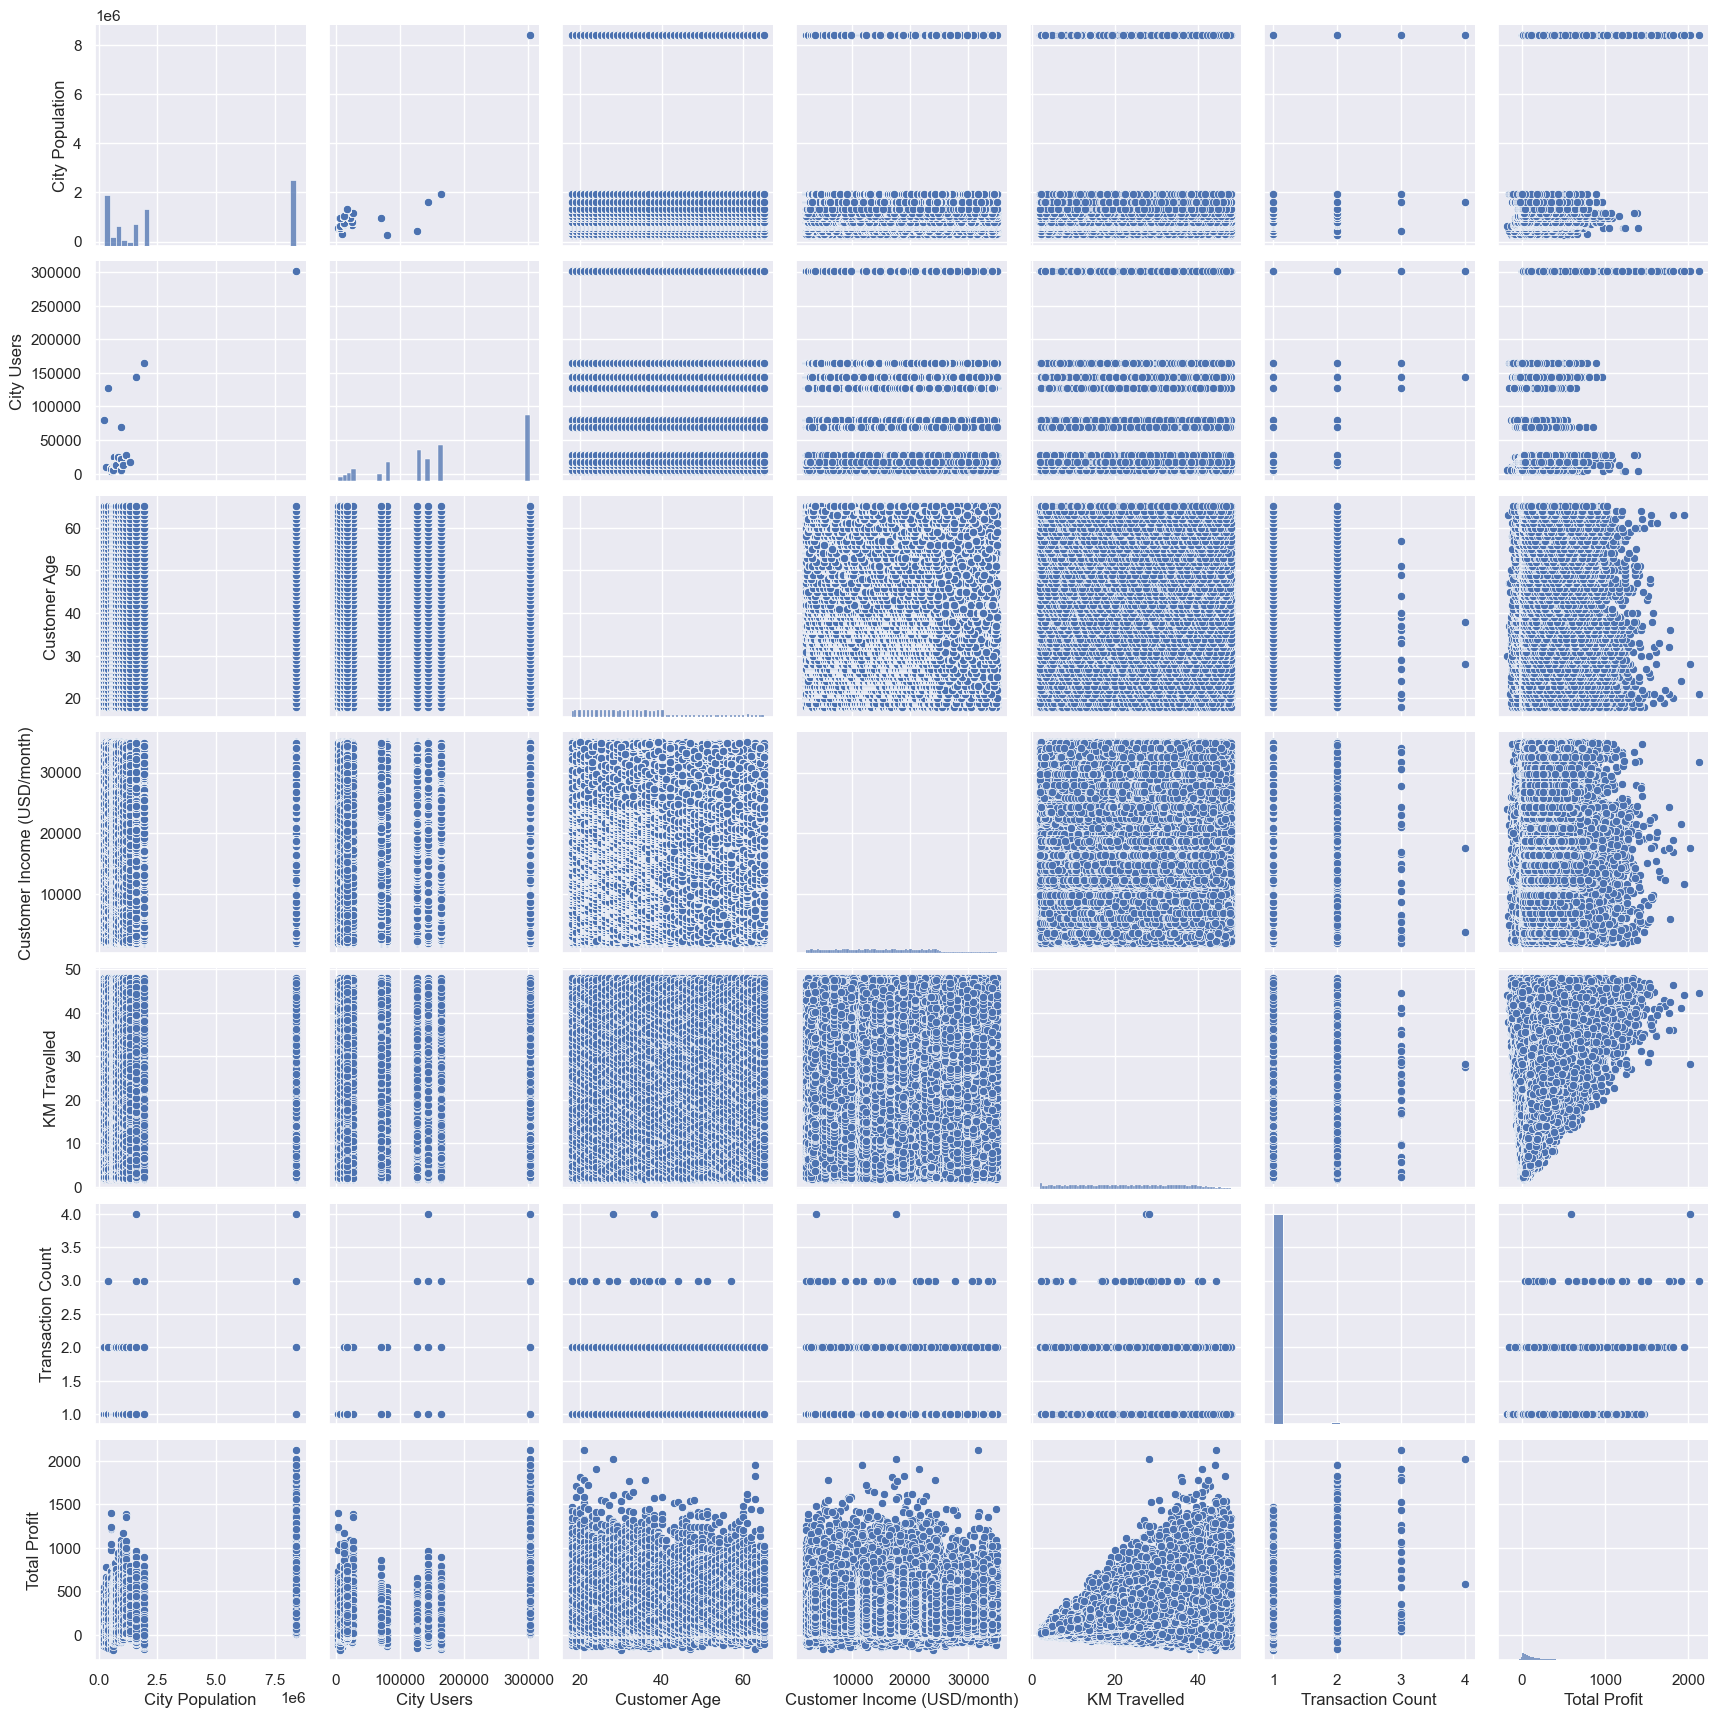

In [66]:
sns.pairplot(df8_Yellow_Cab);

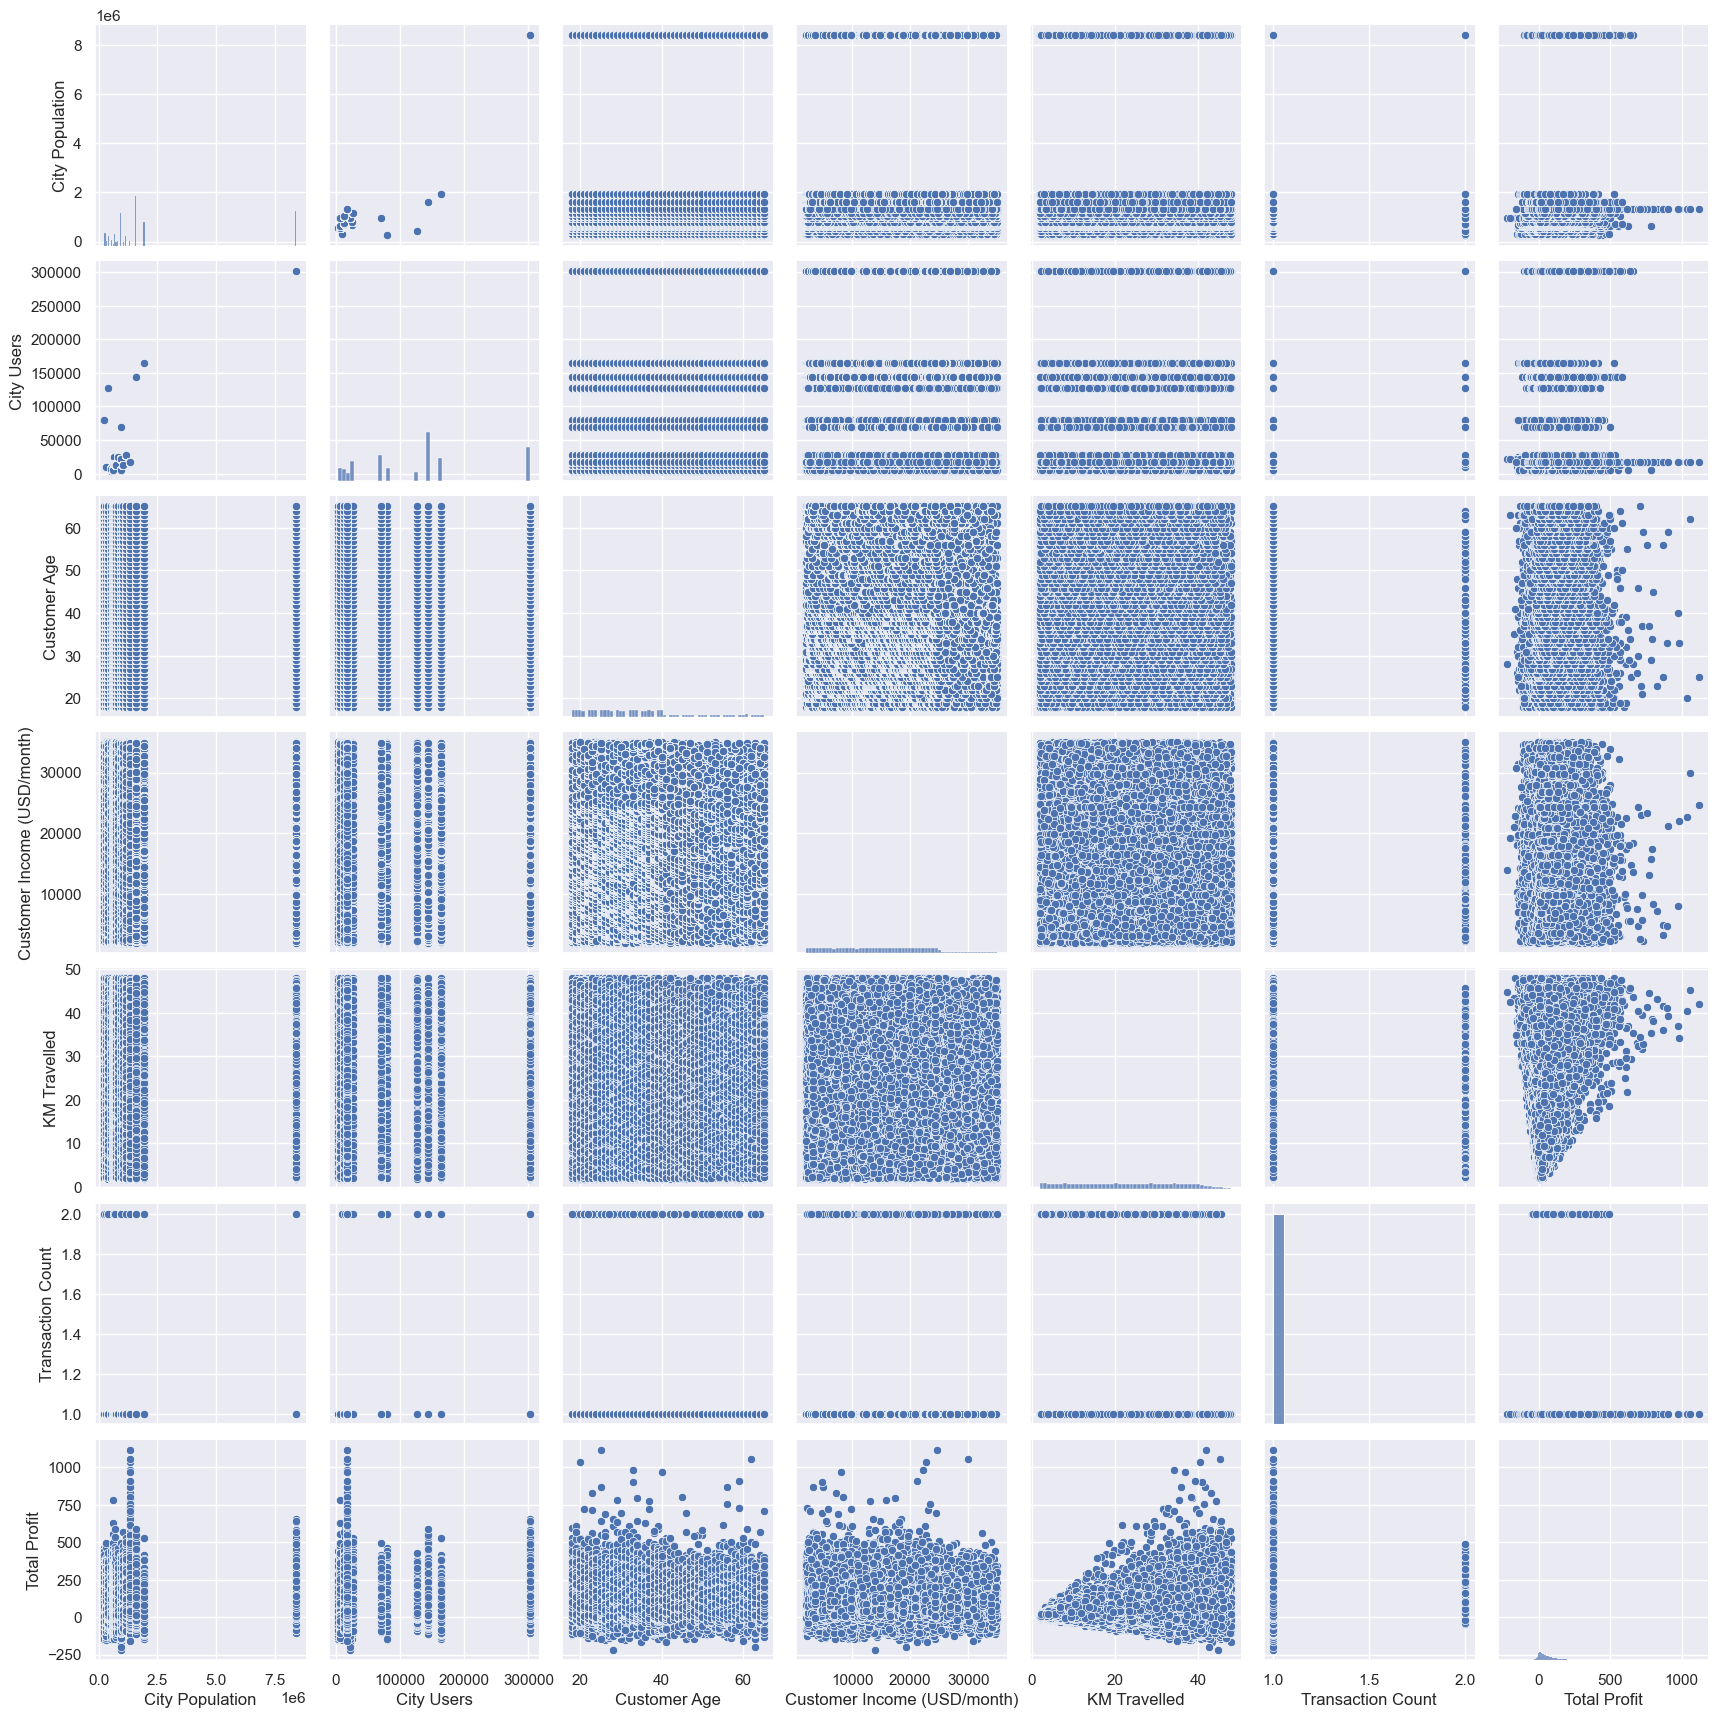

In [67]:
sns.pairplot(df8_Pink_Cab);

#### It can be observed that there is a clear correlation between profit and the number of kilometers driven. Additionally, New York City stands out in terms of profit.